## Step 1: Gathering Data for this Project


1. **The WeRateDogs Twitter archive:** Downloaded  file manually by clicking the following link: twitter_archive_enhanced.csv

2. **The tweet image predictions:**, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

3. **Twitter API & JSON**: Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

In [1]:
import requests
import tweepy
from timeit import default_timer as timer
import pandas as pd
import json
import numpy as np

In [2]:
## download The tweet image predictions for dog breeds in each tweet

r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

with open('image_predictions.tsv','wb') as f:
    f.write(r.content)

In [4]:
## hide before submitting
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# get tweet IDs for which to gather additional data via Twitter's API
twitter_archive = pd.read_csv('twitter_archive_enhanced.csv')
tweet_ids = twitter_archive.tweet_id.values
print('Number of tweets: ' + str(len(tweet_ids)))

# set a counter to keep track of which tweet we are in
count = 0

# start a timer know how long the code took to run
start = timer()

# set a dictionary of fails to keep track of them
fails_dict = {}

# write each tweet's information to a file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            # use json.dump to write to file
            # the get_status object of tweepy itself is not JSON serializable, 
            # but it has a _json property which contains JSON serializable response data
            json.dump(tweet._json, outfile)
            # we want each tweet's JSON data on its own line, so:
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("A TweepError occured")
            fails_dict[tweet_id] = e
            pass
            
# print amount of time code took to run
end = timer()
print(end - start)

print(fails_dict)


Number of tweets: 2356
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
A TweepError occured
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
A TweepError occured
97
98
99
100
101
102
A TweepError occured
103
104
105
A TweepError occured
106
107
108
109
110
111
112
113
114
115
116
117
118
119
A TweepError occured
120
121
122
123
124
125
126
127
128
129
130
131
132
133
A TweepError occured
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
A TweepError occured
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
A TweepError occured
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
A TweepError occured
213
214
215
216
217
218
219
220
221
222
223
224


1740
1741
1742
1743
1744
1745
1746
1747
1748
1749
1750
1751
1752
1753
1754
1755
1756
1757
1758
1759
1760
1761
1762
1763
1764
1765
1766
1767
1768
1769
1770
1771
1772
1773
1774
1775
1776
1777
1778
1779
1780
1781
1782
1783
1784
1785
1786
1787
1788
1789
1790
1791
1792
1793
1794
1795
1796
1797
1798
1799
1800
1801
1802
1803
1804
1805
1806
1807
1808
1809
1810
1811
1812
1813
1814
1815
1816
1817
1818
1819
1820
1821
1822
1823
1824
1825
1826
1827
1828
1829
1830
1831
1832
1833
1834
1835
1836
1837
1838
1839
1840
1841
1842
1843
1844
1845
1846
1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939


In [3]:
# read the .txt file line by line into a list
list_for_df = []

with open('tweet_json.txt') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        tweet_id = json_data['id']
        favorite_count = json_data['favorite_count']
        retweet_count = json_data['retweet_count']
        retweeted = json_data['retweeted']

        list_for_df.append({'tweet_id': tweet_id,
                            'favorite_count': favorite_count,
                            'retweet_count': retweet_count,
                            'retweeted': retweeted})

# result is a list of dictionaries

In [4]:
# create dataframe with list of dictonaries
df = pd.DataFrame(list_for_df, columns = ['tweet_id', 'favorite_count', 'retweet_count', 'retweeted'])
df.head()

,tweet_id,favorite_count,retweet_count,retweeted
0,892420643555336193,35730,7558,False
1,892177421306343426,30871,5598,False
2,891815181378084864,23219,3710,False
3,891689557279858688,39025,7740,False
4,891327558926688256,37279,8334,False


In [5]:
# export dataframe to csv file
df.to_csv('tweet_json.csv', encoding = 'utf-8', index=False)



# Assessing Data for this Project

**I will detect and document at least eight (8) quality issues and two (2) tidiness issues.**

Key points to keep in mind when data wrangling for this project:

1. You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
2. Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
3. Cleaning includes merging individual pieces of data according to the rules of tidy data.
4. The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
5. You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

In [2]:
# pass tables to dataframes
tweet_archive = pd.read_csv('twitter_archive_enhanced.csv')
tweet_popularity = pd.read_csv('tweet_json.csv')
tweet_predictions = pd.read_csv('image_predictions.tsv',sep="\t")

In [7]:
tweet_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
sum(tweet_archive.duplicated())

0

In [10]:
tweet_archive.name.value_counts()

None           745
a               55
Charlie         12
Oliver          11
Lucy            11
Cooper          11
Penny           10
Tucker          10
Lola            10
Bo               9
Winston          9
the              8
Sadie            8
Buddy            7
Toby             7
Daisy            7
an               7
Bailey           7
Bella            6
Jack             6
Milo             6
Jax              6
Rusty            6
Dave             6
Leo              6
Stanley          6
Koda             6
Oscar            6
Scout            6
Sunny            5
              ... 
Crimson          1
Skye             1
Diogi            1
Barry            1
Nida             1
Kona             1
Jeffri           1
infuriating      1
Cheryl           1
Brian            1
Geoff            1
Alejandro        1
Saydee           1
Dixie            1
Mutt             1
Tito             1
Mitch            1
Iroh             1
Lipton           1
Sephie           1
Dylan            1
Rontu       

In [9]:
tweet_archive.name[tweet_archive.name.str.islower()]

22            such
56               a
118          quite
169          quite
193          quite
335            not
369            one
542     incredibly
649              a
682            mad
759             an
773           very
801              a
819           very
822           just
852             my
924            one
988            not
992            his
993            one
1002             a
1004             a
1017             a
1025            an
1031          very
1040      actually
1049             a
1063          just
1071       getting
1095           mad
           ...    
2191             a
2198             a
2204            an
2211             a
2212           the
2218             a
2222             a
2235             a
2249             a
2255             a
2264             a
2273             a
2287             a
2304             a
2311             a
2314             a
2326         quite
2327             a
2333            an
2334             a
2335            an
2345        

In [11]:
tweet_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [12]:
# visually analyse cases when denominator is different than the normal 10
with pd.option_context('max_colwidth', 200):
    display(tweet_archive[tweet_archive.rating_denominator != 10])

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,http...",9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,http...",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitte

**It seems like entries with a denominator less than 10 are a few exceptions that are not so relevant, and with higher than 10 it is usually about more than a dog in the picture**

In [13]:
tweet_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

# ----------------------------------------------------------------------------------------------------------------

In [14]:
tweet_popularity.head()

,tweet_id,favorite_count,retweet_count,retweeted
0,892420643555336193,35730,7558,False
1,892177421306343426,30871,5598,False
2,891815181378084864,23219,3710,False
3,891689557279858688,39025,7740,False
4,891327558926688256,37279,8334,False


In [15]:
sum(tweet_popularity.duplicated())

0

In [16]:
tweet_popularity.retweeted.value_counts()

False    2331
Name: retweeted, dtype: int64

# ----------------------------------------------------------------------------------------------------------------

In [17]:
tweet_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [18]:
tweet_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
sum(tweet_predictions.duplicated())

0

In [20]:
sum(tweet_predictions.jpg_url.duplicated() == True)

66

In [21]:
tweet_predictions[(tweet_predictions.p1_dog == False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,1.459380e-02,False,golden_retriever,7.958960e-03,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,2.784070e-01,True,groenendael,1.026430e-01,True
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,1.041090e-01,True,dingo,6.207120e-02,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,1.671750e-01,True,Chihuahua,8.695060e-02,True


##  Quality issues

In table ``tweet_archive``
1. Data type in 'timestamp' column is string instead of datetime, and there should be columns for year, month and day
2. There are 181 retweets - we only want original tweets with images
3. Columns [doggo, floofer, pupper, puppo] have "None" values instead of null values
4. Column 'name' has values 'None', 'a', 'an', 'the' and other wrong ones
5. There are rating_denonimator values other than 10 and wrong numerator values
6. Drop columns that won't be used for the analysis


In table ``tweet_predictions``
7. Names in columns p1, p2 and p3 have different capitalisations
8. Only use first (stronger) prediction and rename the columns to 'prediction', 'confidence' and 'is_dog'
9. Drop duplicated jpg_url rows
10. Drop columns that won't be used for analysis

In table ``tweet_popularity``
11. Drop 'retweeted' column


## Tidiness issues

In table ``tweet_archive``
1. Mutliple columns for dog type variable (doggo, floofer, pupper, puppo)
2. Merge all tables

# Cleaning data for this project

##  Fixing quality issues

**In table ``tweet_archive``**

In [145]:
tweet_archive_clean = tweet_archive.copy()

**1. Data type in 'timestamp' column is string instead of datetime, and there should be columns for year, month and day**

In [146]:
# convert to datetime
tweet_archive_clean.timestamp = pd.to_datetime(tweet_archive_clean.timestamp)

# add year, month and day columns
tweet_archive_clean['year'] = tweet_archive_clean.timestamp.dt.year
tweet_archive_clean['month'] = tweet_archive_clean.timestamp.dt.month
tweet_archive_clean['day'] = tweet_archive_clean.timestamp.dt.day

# test
tweet_archive_clean.info()
tweet_archive_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
year                    

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017,8,1
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017,8,1
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017,7,31
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017,7,30
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017,7,29


**2. There are 181 retweets - we only want original tweets with images**

In [147]:
# drop the 181 rows
tweet_archive_clean = tweet_archive_clean[tweet_archive_clean.retweeted_status_id.isnull()]

# test
tweet_archive_clean[tweet_archive_clean.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day


**3. Columns [doggo, floofer, pupper, puppo] have "None" values instead of null values**


In [148]:
# replace 'None' entries with NaN
tweet_archive_clean.doggo.replace('None', np.nan, inplace=True)
tweet_archive_clean.floofer.replace('None', np.nan, inplace=True)
tweet_archive_clean.pupper.replace('None', np.nan, inplace=True)
tweet_archive_clean.puppo.replace('None', np.nan, inplace=True)

# test
print(tweet_archive_clean.doggo.value_counts())
print(tweet_archive_clean.floofer.value_counts())
print(tweet_archive_clean.pupper.value_counts())
print(tweet_archive_clean.puppo.value_counts())

doggo    87
Name: doggo, dtype: int64
floofer    10
Name: floofer, dtype: int64
pupper    234
Name: pupper, dtype: int64
puppo    25
Name: puppo, dtype: int64


**4. Column 'name' has values 'None', 'a', 'an', 'the' and other wrong ones**


In [149]:
#first replace any NaN values with 'None' to be able to run the next method
tweet_archive_clean.name.replace(np.nan, 'None', inplace=True)

#test
tweet_archive_clean[tweet_archive_clean.name.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day


In [150]:
# replace lowercase names with NaN
tweet_archive_clean.name.mask(tweet_archive_clean.name.str.match(r'^[a-z]+$'), inplace=True)

#test
print(sum(tweet_archive_clean.name.str.contains(r'^[a-z]+$', na=False)))

0


In [151]:
# replace 'None' values with NaN
tweet_archive_clean.name.replace('None', np.nan, inplace=True)

# test
print(sum(tweet_archive_clean.name == 'None'))

0


**5. There are rating_denonimator values other than 10 and wrong numerator values**

(Many of these relate to multiple dogs in a picture or are one off exceptions to the common rating system)

In [152]:
# to retain consistency in the analysis, drop rows with denominator values other than 10
tweet_archive_clean = tweet_archive_clean[tweet_archive_clean.rating_denominator == 10]

# test
tweet_archive_clean.rating_denominator.value_counts()

10    2153
Name: rating_denominator, dtype: int64

In [153]:
# convert rating_numerator column to float type
tweet_archive_clean.rating_numerator = tweet_archive_clean.rating_numerator.astype(float)

# find ratings with decimal places and check their text
with pd.option_context('max_colwidth', 200):
    display(tweet_archive_clean[tweet_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['tweet_id', 'text', 'rating_numerator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,text,rating_numerator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.0


In [154]:
# replace found values
tweet_archive_clean.loc[(tweet_archive_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
tweet_archive_clean.loc[(tweet_archive_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
tweet_archive_clean.loc[(tweet_archive_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
tweet_archive_clean.loc[(tweet_archive_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
tweet_archive_clean.loc[(tweet_archive_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

#test
with pd.option_context('max_colwidth', 200):
    display(tweet_archive_clean[tweet_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['tweet_id', 'text', 'rating_numerator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  # Remove the CWD from sys.path while we load stuff.


,tweet_id,text,rating_numerator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26


**6. Drop columns that won't be used for the analysis**

(source, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)

In [155]:
# drop columns above
tweet_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], axis=1, inplace=True)

# test
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2153 non-null int64
timestamp             2153 non-null datetime64[ns]
text                  2153 non-null object
rating_numerator      2153 non-null float64
rating_denominator    2153 non-null int64
name                  1388 non-null object
doggo                 87 non-null object
floofer               10 non-null object
pupper                234 non-null object
puppo                 25 non-null object
year                  2153 non-null int64
month                 2153 non-null int64
day                   2153 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(5), object(6)
memory usage: 235.5+ KB


**In table ``tweet_predictions``**


In [156]:
tweet_predictions_clean = tweet_predictions.copy()

**7. Names in columns p1, p2 and p3 have different capitalisations**


In [157]:
# lowercase, remove leading and trailing spaces and replace spaces with underscores
tweet_predictions_clean.p1 = tweet_predictions_clean.p1.str.lower().str.strip().replace(' ', '_')
tweet_predictions_clean.p2 = tweet_predictions_clean.p2.str.lower().str.strip().replace(' ', '_')
tweet_predictions_clean.p3 = tweet_predictions_clean.p3.str.lower().str.strip().replace(' ', '_')

#test
tweet_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


**8. Only use first (stronger) prediction and rename the columns to 'prediction', 'confidence' and 'is_dog'**


In [158]:
# if p1_dog is false, then look for the next prediction that is one of a dog (in p2 and then p3) and replace p1 with that value

count = 0
index_value = 0

for value in tweet_predictions_clean.p1_dog:
    if value == False:
        # get index value for that row
        index_value = tweet_predictions_clean.p1_dog[tweet_predictions_clean.p1_dog == value].index[count]
            
        count += 1
            
        # check if p2 is a dog. If True, replace values in p1
        if tweet_predictions_clean.p2_dog.loc[index_value] == True:
            tweet_predictions_clean.p1.loc[index_value] = tweet_predictions_clean.p2.loc[index_value]
            tweet_predictions_clean.p1_conf.loc[index_value] = tweet_predictions_clean.p2_conf.loc[index_value]
            
            ## GETTING ERROR WITH LINE BELOW
            #tweet_predictions_clean.p1_dog.loc[index_value] = True
            
        # check if p3 is a dog. If True, replace values in p1
        elif tweet_predictions_clean.p3_dog.loc[index_value] == True:
            tweet_predictions_clean.p1.loc[index_value] = tweet_predictions_clean.p3.loc[index_value]
            tweet_predictions_clean.p1_conf.loc[index_value] = tweet_predictions_clean.p3_conf.loc[index_value]
            
            ## GETTING ERROR WITH LINE BELOW
            #tweet_predictions_clean.p1_dog.loc[index_value] = True
            
            # if none is a dog, then replace values with NaN
        else:
            tweet_predictions_clean.p1.loc[index_value] = np.nan
            tweet_predictions_clean.p1_conf.loc[index_value] = np.nan

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [159]:
# rename columns
tweet_predictions_clean.rename(columns={'p1': 'prediction', 'p1_conf': 'confidence'}, inplace=True)

# test 
tweet_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id      2075 non-null int64
jpg_url       2075 non-null object
img_num       2075 non-null int64
prediction    1751 non-null object
confidence    1751 non-null float64
p1_dog        2075 non-null bool
p2            2075 non-null object
p2_conf       2075 non-null float64
p2_dog        2075 non-null bool
p3            2075 non-null object
p3_conf       2075 non-null float64
p3_dog        2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [160]:
# drop rows with null values on prediction
tweet_predictions_clean = tweet_predictions_clean[tweet_predictions_clean.prediction.notnull()]

In [161]:
# test
tweet_predictions_clean[tweet_predictions_clean.prediction.isnull()]

,tweet_id,jpg_url,img_num,prediction,confidence,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


**9. remove duplicated jpg_url rows**

In [162]:
tweet_predictions_clean.drop_duplicates(subset="jpg_url", inplace=True)

**10. Drop columns that won't be used for analysis**


In [163]:
tweet_predictions_clean.drop(['jpg_url', 'img_num', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1, inplace=True)

#test
tweet_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 3 columns):
tweet_id      1691 non-null int64
prediction    1691 non-null object
confidence    1691 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 52.8+ KB


**In table ``tweet_popularity``**


In [164]:
tweet_popularity_clean = tweet_popularity.copy()

**11. Drop 'retweeted' column**


In [165]:
tweet_popularity_clean.drop('retweeted', axis=1, inplace=True)

# test
tweet_popularity_clean.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,35730,7558
1,892177421306343426,30871,5598
2,891815181378084864,23219,3710
3,891689557279858688,39025,7740
4,891327558926688256,37279,8334


## Fixing tidyiness issues


**1. Mutliple columns for dog type variable (doggo, floofer, pupper, puppo)**

In [166]:
# merge multiple columns into one "dog_stage" column
tweet_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']] = tweet_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].replace(np.nan, '', regex=True)
tweet_archive_clean['dog_stage'] = tweet_archive_clean['doggo'] + tweet_archive_clean['floofer'] + tweet_archive_clean['pupper'] + tweet_archive_clean['puppo']
tweet_archive_clean

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day,dog_stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,,,,,2017,8,1,
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,,,,,2017,8,1,
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,,,,,2017,7,31,
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,,,,,2017,7,30,
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,,,,,2017,7,29,
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,13.0,10,NaN,,,,,2017,7,29,
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,13.0,10,Jax,,,,,2017,7,28,
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,13.0,10,NaN,,,,,2017,7,28,
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,13.0,10,Zoey,,,,,2017,7,27,
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,14.0,10,Cassie,doggo,,,,2017,7,26,doggo


In [167]:
# drop unecessary columns
tweet_archive_clean = tweet_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)
tweet_archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,year,month,day,dog_stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,2017,8,1,
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,2017,8,1,
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,2017,7,31,
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,2017,7,30,
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,2017,7,29,


In [168]:
tweet_archive_clean.dog_stage.value_counts()

                1809
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [169]:
# replace multiple stages
tweet_archive_clean.dog_stage = tweet_archive_clean.dog_stage.replace('doggopupper', 'multiple')
tweet_archive_clean.dog_stage = tweet_archive_clean.dog_stage.replace('doggopuppo', 'multiple')
tweet_archive_clean.dog_stage = tweet_archive_clean.dog_stage.replace('doggofloofer', 'multiple')

# replace empty strings with Nan 
tweet_archive_clean.dog_stage = tweet_archive_clean.dog_stage.replace('', np.nan)

# test
tweet_archive_clean.dog_stage.value_counts()

pupper      224
doggo        75
puppo        24
multiple     12
floofer       9
Name: dog_stage, dtype: int64

In [170]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2153 non-null int64
timestamp             2153 non-null datetime64[ns]
text                  2153 non-null object
rating_numerator      2153 non-null float64
rating_denominator    2153 non-null int64
name                  1388 non-null object
year                  2153 non-null int64
month                 2153 non-null int64
day                   2153 non-null int64
dog_stage             344 non-null object
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 185.0+ KB


In [171]:
tweet_archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,year,month,day,dog_stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,2017,8,1,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,2017,8,1,NaN
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,2017,7,31,NaN
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,2017,7,30,NaN
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,2017,7,29,NaN


**2. Merge all tables**

In [172]:
print(tweet_archive_clean.shape[0])
print(tweet_popularity_clean.shape[0])
print(tweet_predictions_clean.shape[0])

2153
2331
1691


In [173]:
tweet_consolidated = pd.merge(tweet_archive_clean, tweet_popularity_clean, on=['tweet_id'], how='left')
tweet_consolidated = pd.merge(tweet_consolidated, tweet_predictions_clean, on=['tweet_id'], how='left')

#test
tweet_consolidated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2152
Data columns (total 14 columns):
tweet_id              2153 non-null int64
timestamp             2153 non-null datetime64[ns]
text                  2153 non-null object
rating_numerator      2153 non-null float64
rating_denominator    2153 non-null int64
name                  1388 non-null object
year                  2153 non-null int64
month                 2153 non-null int64
day                   2153 non-null int64
dog_stage             344 non-null object
favorite_count        2146 non-null float64
retweet_count         2146 non-null float64
prediction            1669 non-null object
confidence            1669 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(5), object(4)
memory usage: 252.3+ KB


In [174]:
tweet_consolidated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2152
Data columns (total 14 columns):
tweet_id              2153 non-null int64
timestamp             2153 non-null datetime64[ns]
text                  2153 non-null object
rating_numerator      2153 non-null float64
rating_denominator    2153 non-null int64
name                  1388 non-null object
year                  2153 non-null int64
month                 2153 non-null int64
day                   2153 non-null int64
dog_stage             344 non-null object
favorite_count        2146 non-null float64
retweet_count         2146 non-null float64
prediction            1669 non-null object
confidence            1669 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(5), object(4)
memory usage: 252.3+ KB


## Storing data

In [175]:
tweet_consolidated.to_csv('twitter_archive_master.csv', index=False)

## Analyzing, and Visualizing Data for this Project

At least three (3) insights and one (1) visualization must be produced.

In [177]:
import matplotlib.pyplot as plt
% matplotlib inline

df = pd.read_csv('twitter_archive_master.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2153 entries, 0 to 2152
Data columns (total 14 columns):
tweet_id              2153 non-null int64
timestamp             2153 non-null object
text                  2153 non-null object
rating_numerator      2153 non-null float64
rating_denominator    2153 non-null int64
name                  1388 non-null object
year                  2153 non-null int64
month                 2153 non-null int64
day                   2153 non-null int64
dog_stage             344 non-null object
favorite_count        2146 non-null float64
retweet_count         2146 non-null float64
prediction            1669 non-null object
confidence            1669 non-null float64
dtypes: float64(4), int64(5), object(5)
memory usage: 235.6+ KB


In [178]:
df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,year,month,day,dog_stage,favorite_count,retweet_count,prediction,confidence
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,2017,8,1,NaN,35730.0,7558.0,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,2017,8,1,NaN,30871.0,5598.0,chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,2017,7,31,NaN,23219.0,3710.0,chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,2017,7,30,NaN,39025.0,7740.0,labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,2017,7,29,NaN,37279.0,8334.0,basset,0.555712


## Insight 1: Favorite dog breeds

In [179]:
# get top 10 most favorited dog breeds
df.groupby('prediction').favorite_count.mean().sort_values(ascending=False).head(10)

prediction
bedlington_terrier         22850.000000
saluki                     21952.000000
french_bulldog             18540.866667
bouvier_des_flandres       16264.000000
afghan_hound               15582.666667
black-and-tan_coonhound    15472.000000
flat-coated_retriever      15302.500000
irish_water_spaniel        14787.000000
leonberg                   13417.000000
whippet                    13332.818182
Name: favorite_count, dtype: float64

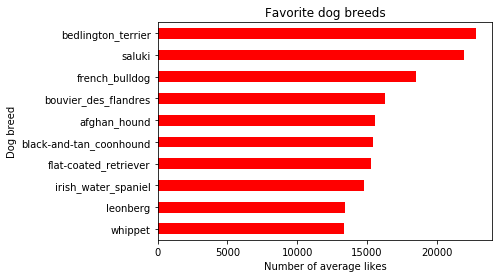

In [180]:
favourite_dog_stages = df.groupby('prediction').favorite_count.mean().sort_values(ascending=False).head(10) 
favourite_dog_stages.plot(kind='barh', color='red')
plt.gca().invert_yaxis()
plt.title('Favorite dog breeds')
plt.xlabel('Number of average likes')
plt.ylabel('Dog breed');

## Insight 2: Most common dog breeds

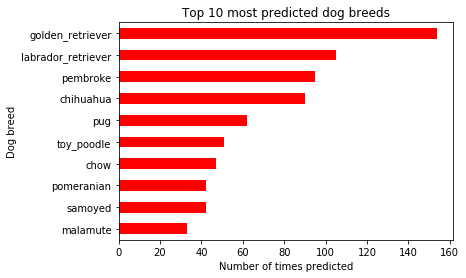

In [181]:
df.prediction.value_counts().head(10).plot(kind='barh', color='red')
plt.gca().invert_yaxis()
plt.title('Top 10 most predicted dog breeds')
plt.ylabel('Dog breed')
plt.xlabel('Number of times predicted');

## Insight 3: Top rated dog breeds

In [182]:
# get dataframe based on filter (dog was predicted at least 10 times )
df2 = df[df.groupby("prediction")['prediction'].transform('size') > 10]
df2.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,year,month,day,dog_stage,favorite_count,retweet_count,prediction,confidence
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,2017,8,1,NaN,30871.0,5598.0,chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,2017,7,31,NaN,23219.0,3710.0,chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,2017,7,30,NaN,39025.0,7740.0,labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,2017,7,29,NaN,37279.0,8334.0,basset,0.555712
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,13.0,10,NaN,2017,7,29,NaN,18795.0,2797.0,chesapeake_bay_retriever,0.425595


In [183]:
# get top 10 average ratings
top_rated = df2.groupby('prediction').rating_numerator.mean().sort_values(ascending=False).head(10) 
top_rated

prediction
samoyed                 11.690476
golden_retriever        11.607143
great_pyrenees          11.428571
pembroke                11.410526
eskimo_dog              11.409091
chow                    11.404255
cocker_spaniel          11.333333
siberian_husky          11.315789
kelpie                  11.307692
bernese_mountain_dog    11.272727
Name: rating_numerator, dtype: float64

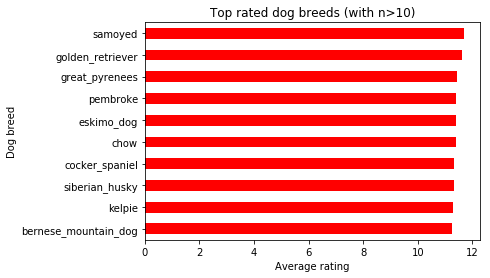

In [184]:
top_rated.plot(kind='barh', color='red')
plt.gca().invert_yaxis()
plt.title('Top rated dog breeds (with n>10)')
plt.ylabel('Dog breed')
plt.xlabel('Average rating');